In [31]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [32]:
data1 = pd.read_csv("New_way_data _base.csv")

In [33]:
#data = np.loadtxt("dataset_OBD_new.csv",delimiter=",")

In [34]:
data1.shape

(11999, 8)

In [35]:
data1.head()

,BAROMETRIC_PRESSURE,ENGINE_COOLANT_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,SPEED,THROTTLE_POS,class
0,101.000000,89.000000,1173.000000,35.000000,3.470000,9.000000,0.184000,0
1,95.317414,104.702540,4793.486993,69.295708,51.247763,56.748608,0.700599,1
2,96.340461,104.444472,3649.884731,58.358234,68.126434,11.383728,0.637216,1
3,100.000000,84.000000,1582.000000,82.000000,26.920000,44.000000,0.369000,0
4,99.000000,85.000000,1657.000000,37.000000,9.290000,36.000000,0.278000,0


In [36]:
data = np.array(data1)

In [37]:
data[0]

array([1.010e+02, 8.900e+01, 1.173e+03, 3.500e+01, 3.470e+00, 9.000e+00,
       1.840e-01, 0.000e+00])

In [38]:
data.shape

(11999, 8)

In [39]:
x = data[:,0:-1]
y = data[:,-1]

# Spliting dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
print(x.shape)
print(y.shape)

(11999, 7)
(11999,)


In [40]:
x_train.shape

(9599, 7)

In [41]:
x_test.shape

(2400, 7)

In [42]:
y_test.shape

(2400,)

In [43]:
y_train.shape

(9599,)

In [44]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
y_train

array([0., 0., 0., ..., 0., 0., 1.])

In [46]:
x_train.shape[1]

7

# Creating the model

In [57]:
model = Sequential()
model.add(Dense(10,input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compiling the model 

In [59]:
learning_rate = 0.001
model.compile(loss="binary_crossentropy",metrics=['accuracy'],optimizer=Adam(learning_rate))

# Training 

In [60]:
epochs = 90
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/90
300/300 [==============================] - 0s 1ms/step - loss: 7.4737 - accuracy: 0.6769 - val_loss: 0.1761 - val_accuracy: 0.9908
Epoch 2/90
300/300 [==============================] - 0s 940us/step - loss: 0.0895 - accuracy: 0.9954 - val_loss: 0.0543 - val_accuracy: 0.9975
Epoch 3/90
300/300 [==============================] - 0s 937us/step - loss: 0.0352 - accuracy: 0.9969 - val_loss: 0.0295 - val_accuracy: 0.9967
Epoch 4/90
300/300 [==============================] - 0s 941us/step - loss: 0.0221 - accuracy: 0.9974 - val_loss: 0.0310 - val_accuracy: 0.9908
Epoch 5/90
300/300 [==============================] - 0s 971us/step - loss: 0.0159 - accuracy: 0.9978 - val_loss: 0.0162 - val_accuracy: 0.9967
Epoch 6/90
300/300 [==============================] - 0s 985us/step - loss: 0.0127 - accuracy: 0.9978 - val_loss: 0.0178 - val_accuracy: 0.9929
Epoch 7/90
300/300 [==============================] - 0s 967us/step - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0109 - val_accuracy: 0

Epoch 56/90
300/300 [==============================] - 0s 990us/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 57/90
300/300 [==============================] - 0s 1ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 58/90
300/300 [==============================] - 0s 1ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0068 - val_accuracy: 0.9975
Epoch 59/90
300/300 [==============================] - 0s 949us/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 60/90
300/300 [==============================] - 0s 952us/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0059 - val_accuracy: 0.9987
Epoch 61/90
300/300 [==============================] - 0s 1ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0106 - val_accuracy: 0.9967
Epoch 62/90
300/300 [==============================] - 0s 982us/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0026 - val_accuracy

# Ploting 

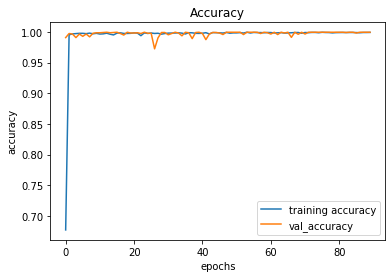

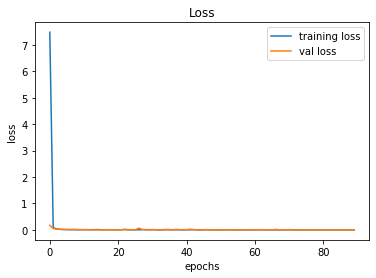

In [61]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# prediction on training data
label = np.array(y_train)
pred_train = model.predict_classes(x_train)
print("Accuracy on training data = ",accuracy_score(label,pred_train)*100,"%")

# prediction on test data
label = np.array(y_test)
pred_test = model.predict_classes(x_test)
print("Accuracy on test data = ",accuracy_score(label,pred_test)*100,"%")
print(pred_test.reshape(1,y_test.shape[0]))
print(label)

In [ ]:
model.save('anomaly_detection_model_final.h5')

# Loading the model

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('anomaly_detection_model_final.h5')

In [ ]:
model.summary()

In [ ]:
# Trying with real world input
samples = np.array([data[6][0:-1]])     
samples

In [ ]:
prediction = model.predict_classes(samples)
prediction

In [ ]:
pred = model.predict(samples)
pred

In [ ]:
# Trying with real world input
samples = np.array([data[8][0:-1]])     
samples

In [ ]:
prediction = model.predict_classes(samples)
prediction

In [ ]:
pred = model.predict(samples)
pred